**Task 3**

Make a program that can remove only a human body from a video frame.
Your program should take video frames. You can read video frames from a camera or a video file, but the video should have the human body in frames. Your program should remove only one human body from the frames and show the result on a window.
While playing the video, your program should provide a histogram for the first frame of that video frame. Please use matplotlib for displaying the histogram.
If the video ends or user press “q” in keyboard, your program should show a plot which shows human body’s movement/path in the video.
It is ok for you to limit the human body to the face or hand, but the displayed path should be reasonable. (you can display on the video frame also for debug purpose)
So, your program for Task 3 should display a series of windows. here is the list.
Original video frame playing window
Body removal result window
Histogram
Body movement display window

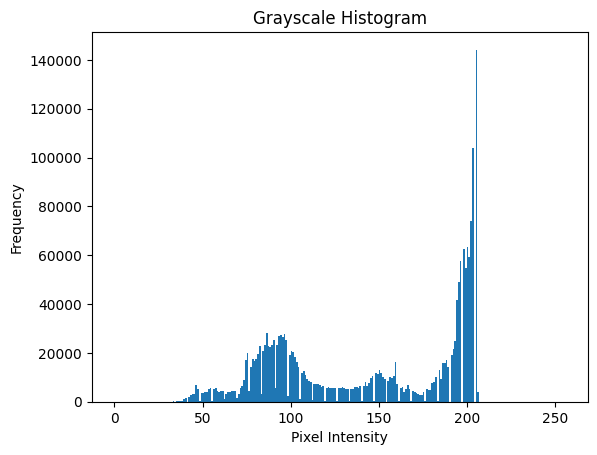

Video ended or failed to capture frame.


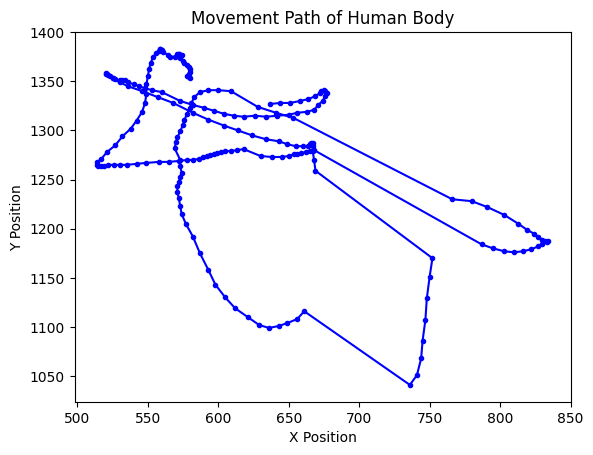

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

prev_position = None
movement_path = []

def remove_body(frame):
    # Convert frame to grayscale and apply a binary threshold to detect human body
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours and remove the largest one (assumed human body)
    contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        cv2.drawContours(frame, [largest_contour], -1, (0, 0, 0), thickness=cv2.FILLED)
        
        # Calculate the center of the contour to track movement
        M = cv2.moments(largest_contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            global prev_position
            prev_position = (cx, cy)
            movement_path.append(prev_position)

    return frame

def plot_histogram(frame):
    # Calculate histogram for the first frame
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    plt.figure("Histogram")
    plt.hist(gray_frame.ravel(), 256, [0, 256])
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show(block=False)

def plot_movement_path(movement_path):
    # Plot the movement path
    plt.figure("Body Movement Path")
    if movement_path:
        x, y = zip(*movement_path)
        plt.plot(x, y, marker="o", color="blue", markersize=3)
    plt.title("Movement Path of Human Body")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show()

def main(video_source=0):
    # Open video source (0 for webcam or a video file path)
    cap = cv2.VideoCapture(video_source)
    first_frame = True

    try:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                print("Video ended or failed to capture frame.")
                break
            
            # Display the original frame
            cv2.imshow("Original Frame", frame)
            
            # Generate histogram for the first frame
            if first_frame:
                plot_histogram(frame)
                first_frame = False

            # Remove human body from the frame
            processed_frame = remove_body(frame.copy())
            
            # Display the processed frame
            cv2.imshow("Body Removed Frame", processed_frame)

            # Press 'q' to quit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    except KeyboardInterrupt:
        print("\nProgram interrupted by user.")

    finally:
        # Release video capture and close windows
        cap.release()
        cv2.destroyAllWindows()

        # Show the movement path of the human body
        plot_movement_path(movement_path)

if __name__ == "__main__":
    main(r"C:\Users\dell\OneDrive - UT Arlington\Tasks\IMG.mov")  # Replace "path_to_video.mp4" with your video file or 0 for webcam
